### Initializing pre-trained models

https://pytorch.org/vision/stable/models.html

In [1]:
import torch
import urllib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms


In [2]:
'''
Here we'll download a pre-trained UNet model from PyTorch Hub
The model is trained on MR images from TCIA LGG collection with segmentation masks approved by a board-certified
radiologist at Duke University.
Reference: https://github.com/mateuszbuda/brain-segmentation-pytorch
'''

# The model requires input channel is 3 and output channel is 1
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)

Using cache found in /users/5/mo000007/.cache/torch/hub/mateuszbuda_brain-segmentation-pytorch_master


#### Input images for pre-trained model should have 3 channels and be resized to 256x256 pixels and z-score normalized per volume.

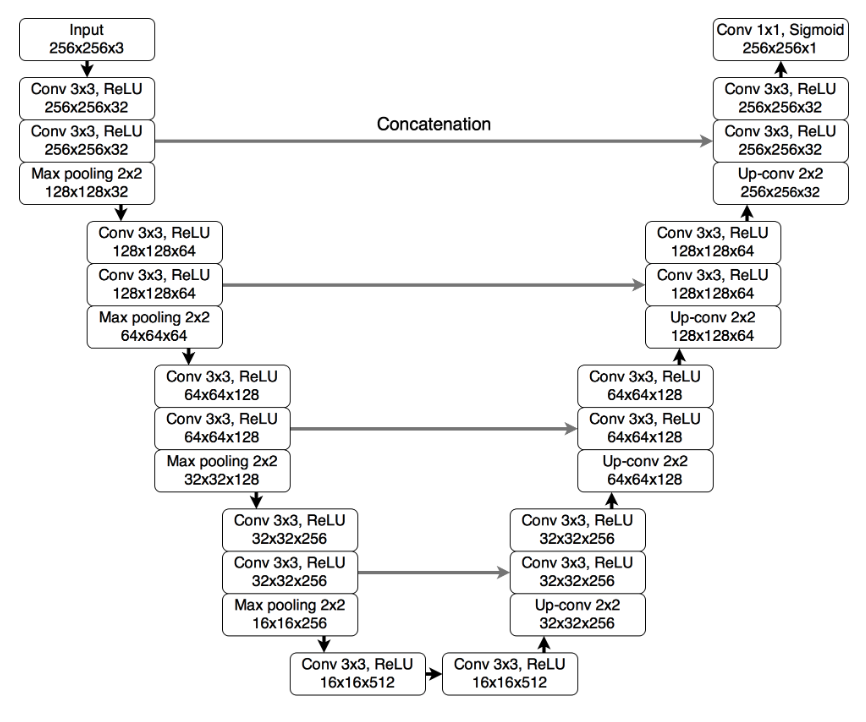

In [3]:
# Download an example image
url, filename = ("https://github.com/mateuszbuda/brain-segmentation-pytorch/raw/master/assets/TCGA_CS_4944.png", "TCGA_CS_4944.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)


Size of image:  (256, 256)
Channels:  RGB
Shape of image(in numpy):  (256, 256, 3)


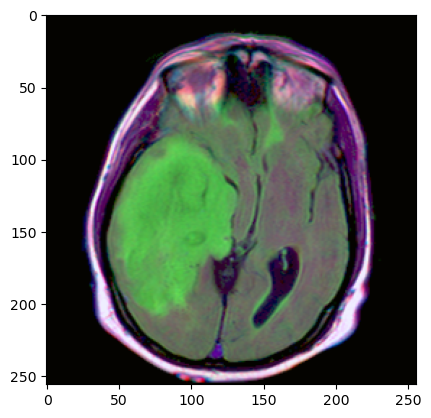

In [4]:
# Open image and visualize it
input_image = Image.open(filename)

print("Size of image: ", input_image.size)
print("Channels: ", input_image.mode)
print("Shape of image(in numpy): ", np.array(input_image).shape)
plt.imshow(input_image)


In [5]:
# Analyse mean and standard deviation of the input image
mean, std = np.mean(input_image, axis=(0, 1)), np.std(input_image, axis=(0, 1))
print("Mean: ", mean)
print("Standard deviation: ", std)


Mean:  [59.65196228 66.12484741 57.84906006]
Standard deviation:  [59.07813102 68.73045249 58.8932161 ]


In [6]:
# Transform the image: transform into tensor and normalize it
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

print("Type of input_tensor: ", type(input_tensor))
print("Shape of tensor: ", input_tensor.shape)
print("Shape of batch: ", input_batch.shape)


Type of input_tensor:  <class 'torch.Tensor'>
Shape of tensor:  torch.Size([3, 256, 256])
Shape of batch:  torch.Size([1, 3, 256, 256])


In [7]:
# Check if cuda is available and if yes, send input batch and model to gpu device
if torch.cuda.is_available():
    print("cuda is available")
    input_batch = input_batch.to('cuda')
    model = model.to('cuda')

    
# Disabling gradient calculation for inference as it reduces memory consumption
# as it will not call tensor.backward() which calculate gradients
with torch.no_grad():
    output = model(input_batch)

print(torch.round(output[0]))


cuda is available
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0')


In [8]:
print("Type of output: ", type(output))


Type of output:  <class 'torch.Tensor'>


In [9]:
# Convert tensor back to cpu numpy
output_image = output.detach().cpu().numpy()[0].squeeze()
print("Type of output image: ", type(output_image))
print("Shape of output image: ", output_image.shape)


Type of output image:  <class 'numpy.ndarray'>
Shape of output image:  (256, 256)


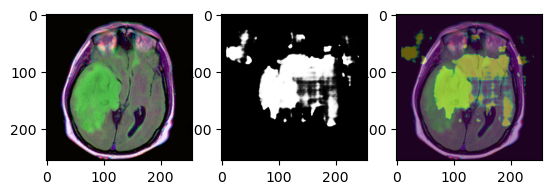

In [10]:
# Visualize the result
fig, axes = plt.subplots(1, 3)
axes[0].imshow(input_image, cmap='gray')
axes[1].imshow(output_image, cmap='gray')
axes[2].imshow(input_image)
axes[2].imshow(output_image, alpha=0.4)


### Reference

### https://pytorch.org/hub/mateuszbuda_brain-segmentation-pytorch_unet/